# SMOTE - Erzeugung eines neuen Datenpunktes auf einer Verbindungslinie
Das Notebook illustriert, wie SMOTE-Algorithmus ein neuer Datenpunkt auf der Verbindungslinie zwischen zwei Datenpunkten erzeugt wird. Der verwendete Source Code ist eine leichte Modifikation des Source Codes, welcher unter folgendem Link zu finden ist: <https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_illustration_generation_sample.html> .
DIe Modifikationen beschränken sich hierbei auf eine deutsche Übersetzung, das Einführen einer Funktion zum Abspeichern der Abbildung, das Abändern der Variablennamen, das Verschieben eines Datenpunktes und das Einführen unterschiedlicher Symbole für Datenpunkte die zu einer Klasse gehören.

In [5]:
# Importierung des Moduls os
import os

# Erstellung eines Speicherort für die Graphen
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "os_bsp_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Funktion zur Abspeicherung von Bildern.
# fig_id legt den Namen des abgespeicherten Bildes fest.
# tight_layout passt automatisch die Größe mehrerer untergeordneter Graphen an, damit diese sich nicht überschneiden.
# fig_extension legt den Datentyp des abgespeicherten Bildes fest.
# resolution bestimmt die Auflösung des Bildes.
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
%matplotlib inline


## Erzeugung eines Datenpunktes in SMOTE-ähnlichen Oversampling-Methoden

Dieses Beispiel verdeutlicht wie ein neuer Datenpunkt unter Einbezug dessen Nachbarn generiert wird. Der neue Datenpunkt wird auf der Verbindungslinie zwischen zwei zufällig gewählten Nachbarn interpoliert.


Automatically created module for IPython interactive environment
Saving figure SMOTE_vis


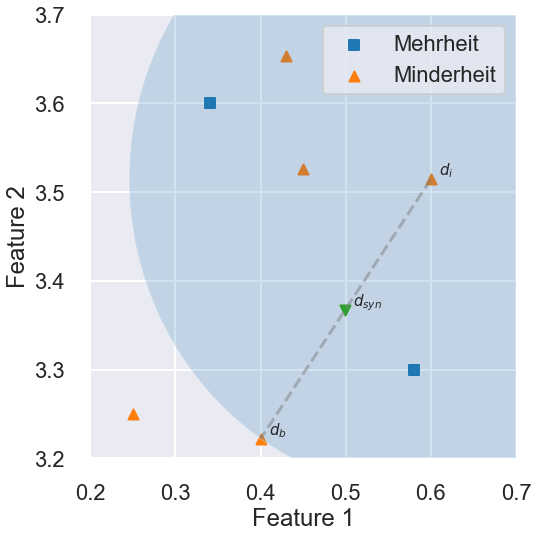

In [8]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

rng = np.random.RandomState(18)

f, ax = plt.subplots(figsize=(8, 8))

# Datenpunkte generieren.
y = np.array([3.65284, 3.52623, 3.51468, 3.22199, 3.25])
z = np.array([0.43, 0.45, 0.6, 0.4, 0.25])
y_2 = np.array([3.3, 3.6])
z_2 = np.array([0.58, 0.34])

# Die Datenpunkte der Mehrheit und die der Minderheit anzeigen.
ax.scatter(z_2, y_2, label="Mehrheit", s=100, marker='s')
ax.scatter(z, y, label="Minderheit", s=100, marker='^')

idx = rng.randint(len(y), size=2)
annotation = [r"$d_i$", r"$d_{b}$"]

for a, i in zip(annotation, idx):
    ax.annotate(a, (z[i], y[i]), xytext=tuple([z[i] + 0.01, y[i] + 0.005]), fontsize=15)

# Einen Kreis malen, in welchem die Nachbarn des Datenpunktes liegen.
radius = np.sqrt((z[idx[0]] - z[idx[1]]) ** 2 + (y[idx[0]] - y[idx[1]]) ** 2)
circle = plt.Circle((z[idx[0]], y[idx[0]]), radius=radius, alpha=0.2)
ax.add_artist(circle)

# Zeichnen der Linie auf welchem der neue Datenpunkt generiert wird.
ax.plot(z[idx], y[idx], "--", alpha=0.5, color='grey')

# Den neuen Datenpunkt erstellen und anzeigen.
step = rng.uniform()
y_gen = y[idx[0]] + step * (y[idx[1]] - y[idx[0]])
z_gen = z[idx[0]] + step * (z[idx[1]] - z[idx[0]])

ax.scatter(z_gen, y_gen, s=100, marker='v')
ax.annotate(
    r"$d_{syn}$",
    (z_gen, y_gen),
    xytext=tuple([z_gen + 0.01, y_gen + 0.005]),
    fontsize=15,
)

# Beschriftungen an die Grafik anfügen.
sns.despine(ax=ax, offset=10)
ax.set_xlim([0.2, 0.7])
ax.set_ylim([3.2, 3.7])
plt.xlabel(r"Feature 1")
plt.ylabel(r"Feature 2")
plt.legend()
plt.tight_layout()
save_fig('SMOTE_vis')
plt.show()